# Project: Investigate TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset contains information about 10 000 movies collected from [The Movie Database TMDb](https://www.themoviedb.org/). 

In the following report, we will try to identify the metrics that we can use to estimate the success of a movie and the factors influencing them. 

For the metrics, we will explore revenue, ROI, popularity and vote average.

For the factors, we will explore budget, release date and genre.

### Questions: 

* What’s the distribution of revenue ?
* What’s the distribution of ROI ?
* What’s the relationship between popularity and revenue ?
* What’s the relationship between popularity and ROI ?
* What’s the relationship between vote average and revenue ?
* What’s the relationship between vote average and ROI ?
* What’s the distribution of budget ?
* What’s the relationship between budget and revenue ?
* What’s the relationship between budget and ROI ?
* What’s the average budget for each genre ?
* What’s the average ROI for each genre ?
* What’s the average revenue for each genre ?
* What’s the average revenue for each month of the year ?
* What’s the average ROI for each month of the year ?

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load the movies dataset tmdb-movies.csv
df = pd.read_csv('tmdb-movies.csv')

Get a quick view of the dataset.

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Get information about the types and the number of non-null values in the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Notice that there are missing values for imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production_companies.

The year in the release_date column does not contain the century and it is a string data type. For convenience, it will be converted into a datetime object further in this notebook.

Get the number of unique values for each column.

In [5]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### Explore Numerical Variables:

Get a summary of our numerical variables.

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Notice that there are many zero values for budget, revenue and runtime. These values are probably missing values that were filled with zeroes.

Get the number of zero values in the budget, revenue and runtime columns.

In [7]:
# Get the number of zero budget values
df.query('budget == 0').shape

(5696, 21)

There are 5696 zeros in the budget column.

In [8]:
# Get the number of zero revenue values
df.query('revenue == 0').shape

(6016, 21)

There are 6016 zeros in the revenue column.

In [9]:
# Get the number of zero budget values
df.query('runtime == 0').shape

(31, 21)

There are 31 zeros in the runtime column.

Examine visually the distribution of popularity, budget, revenue, runtime, vote_count and vote_average.

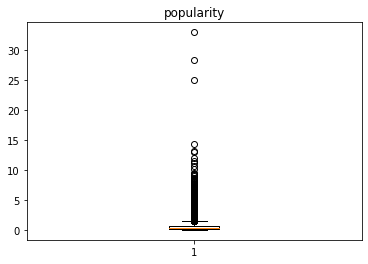

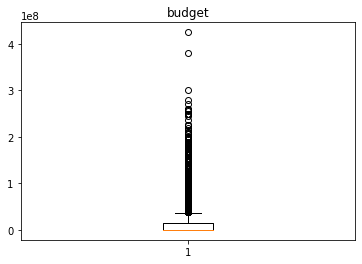

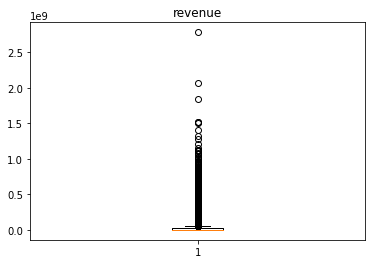

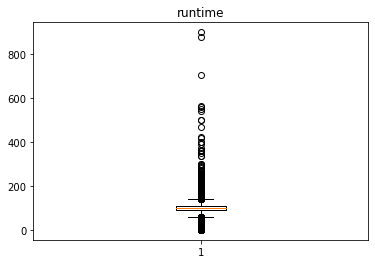

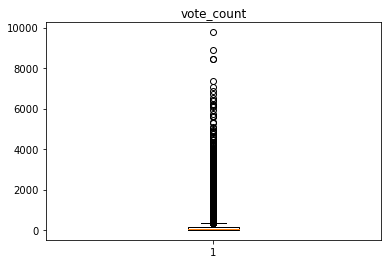

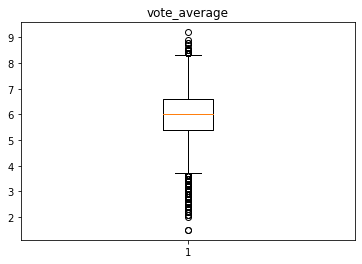

In [10]:
# Create a list of the columns of interest
cols = ['popularity', 'budget', 'revenue', 'runtime', 'vote_count', 'vote_average']
# Create a boxplot for each column
for col in cols:
    # Get a new axes object
    _ ,ax = plt.subplots()
    # Draw a boxplot 
    ax.boxplot(df[col])
    ax.set_title(col)

Notice that we have a lot of outliers for each of the above-mentioned columns.

### Explore Non Numerical Variables:

Get the number of null values in genres.

In [11]:
df[df.genres.isnull()].shape

(23, 21)

There are 23 null values in genres

Check if there are missing values for non-numerical variables represented by empty strings or blank spaces.

Get the number of movies with an empty genre.

In [12]:
# Replace empty spaces by an empty string then
# check if there are any empty strings
empty_genre = df[df['genres'].str.replace(' ', '') == '']
empty_genre.shape

(0, 21)

There are no empty strings in the genre column.

Get the number of movies with an empty date.

In [13]:
# Replace empty spaces by an empty string then
# check if there are any empty strings
no_date = df[df['release_date'].str.replace(' ', '') == '']
no_date.shape

(0, 21)

There are no empty strings in the release date column.

### Filling Missing Values:

#### Filling missing genres and runtime:

In order to fill our missing values, we'll be using the [**OMDb API**](https://www.omdbapi.com/).
This website offers a great wealth of data about movies including genre and runtime. We can get  a free [**API Key**](https://www.omdbapi.com/apikey.aspx) with a 1000 requests limit per day.
Please follow the steps below to get your key:
* Visit this [link](https://www.omdbapi.com/apikey.aspx)
* Choose the 'FREE' account type.
* You will be presented with a form. Fill in your first and last name, your email and a small description of how you'll use the API.
* After submitting the form, you will receive an email with your free API KEY and a link to activate your key.

Here is the API key that I got from OMDb.

In [14]:
import api_key
# Insert your api key to get the movies. 
# API KEY
API_KEY = api_key.KEY

Import the necessary packages for making API requests.

In [15]:
import json
import urllib.request, urllib.parse, urllib.error

Define a function that will get a movie from the API.

In [16]:
def get_movie(title, year):
    # Encode the parameters
    params = urllib.parse.urlencode({'apikey':API_KEY, 't':title, 'y':year})
    # Add the parameters to the url
    url = 'https://www.omdbapi.com/?%s' % params
    try:
        # Retrieve the url from the web
        data = urllib.request.urlopen(url).read().decode()
        # Load the data as a JSON
        js = json.loads(data)
        # Get the response and tranform it into a bool
        response = js["Response"] == 'True'

        if response is True:
            # Separate genres with | like in the dataframe
            genres = js['Genre'].replace(',', '|')
            # The api returns the runtime as a string
            # like '90 min' but we're only interested in the minutes
            # which is the first element of the string and we need it
            # as an integer to put it in the dataframe
            runtime = int(js["Runtime"].split()[0].strip())

            return {
                'genres':genres,
                'runtime':runtime           
            }
        else:
            return None
    except:
        print('An error occured while accessing: \n' + url)    

Store the titles that either miss the genre or have a runtime of 0.

In [17]:
# Get the titles that miss either genres or the runtime equals 0
missing_values_df = df[(df.genres.isnull()) | (df['runtime'] == 0)]['original_title']

Try to retrieve the titles with missing values from the API and fill the original dataframe. 

In [18]:
not_found_movies = []
counter = 0
movies_count = len(missing_values_df)
for i, missing_title in missing_values_df.iteritems():
    # get the Series corresponding the the current element
    missing_movie = df.iloc[i]
    # print the movie that we're trying to retrieve
    print('Trying to retrieve the title: ' + missing_title)
    # get the Series of the missing values
    na_values = missing_movie.isna()
    # Try to get the movie from the API
    movie = get_movie(missing_title, missing_movie['release_year'])
    # Fill the missing values of the movies that were found
    if movie is not None:
        counter += 1
        print('Retrieved ' + str(counter) + '/' + str(movies_count) + ' titles')
        
        # If the genre is null, it is replaced with genre that we got from the API
        if na_values['genres']:
            df.at[i, 'genres'] = movie['genres']
        # If the runtime equals 0, it is replaced with the runtime that we got from the API   
        if missing_movie['runtime'] == 0:
            df.at[i, 'runtime'] = movie['runtime']
            
        print('Filled the missing values')
        
    else:
        # Update a list of the movies that were not found
        not_found_movies.append((i, missing_title))
        print("Couldn't retrieve the title: " + missing_title)
        
# Print done after finishing to retrieve all the titles that we could find with the API        
print('-----------------DONE----------------------')

Trying to retrieve the title: Mythica: The Necromancer
Retrieved 1/53 titles
Filled the missing values
Trying to retrieve the title: Ronaldo
Retrieved 2/53 titles
Filled the missing values
Trying to retrieve the title: Anarchy Parlor
Retrieved 3/53 titles
Filled the missing values
Trying to retrieve the title: Belli di papÃ 
Retrieved 4/53 titles
Filled the missing values
Trying to retrieve the title: The Exorcism of Molly Hartley
Retrieved 5/53 titles
Filled the missing values
Trying to retrieve the title: If There Be Thorns
Retrieved 6/53 titles
Filled the missing values
Trying to retrieve the title: Deep Dark
Retrieved 7/53 titles
Filled the missing values
Trying to retrieve the title: The Outfield
Retrieved 8/53 titles
Filled the missing values
Trying to retrieve the title: All Hallows' Eve 2
Retrieved 9/53 titles
Filled the missing values
Trying to retrieve the title: Star Wars Rebels: Spark of Rebellion
Couldn't retrieve the title: Star Wars Rebels: Spark of Rebellion
Trying to r

There were 45 retrieved titles over 53. 

Get the number of null genres.

In [19]:
df[(df.genres.isnull())].shape

(6, 21)

The number of missing genres went from 23 to 6, it's a gain of 17 movies.

Get the number of movies with a runtime of 0.

In [20]:
df[df['runtime'] == 0].shape

(2, 21)

The number of missing runtime went from 31 to 2, it's a gain of 29 movies.

#### Filling missing revenue and budget:

Missing values in budget and revenue will be filled with the Opus Dataset. This dataset is provided by [The Numbers](https://www.the-numbers.com/), a company that tracks financial movie data. 

In order to get this dataset, I filled their [form](https://www.opusdata.com/) and they emailed me with a sample of the data that they can provide.

In [21]:
# load opus data
opus_df = pd.read_csv('MovieData.csv')

Get an overview of the data.

In [22]:
opus_df.head()

,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel,running_time
0,Madea's Family Reunion,2006,8220100,10000000,63257940,62581,PG-13,Contemporary Fiction,Based on Play,Live Action,Comedy,1.0,NaN
1,Krrish,2006,58540100,10000000,1430721,31000000,Not Rated,Science Fiction,Original Screenplay,Live Action,Action,1.0,NaN
2,End of the Spear,2006,34620100,10000000,11748661,175380,PG-13,Historical Fiction,Original Screenplay,Live Action,Drama,0.0,NaN
3,A Prairie Home Companion,2006,24910100,10000000,20342852,6373339,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0,105.0
4,Saw III,2006,5840100,10000000,80238724,83638091,R,Contemporary Fiction,Original Screenplay,Live Action,Horror,1.0,NaN


Get the number of entries.

In [23]:
opus_df.shape

(1936, 13)

Make both original_title in our dataset and movie_name in opus dataset lowercase in order to avoid any false name mismatch.

In [24]:
# Make original title lowercase
df.original_title = df.original_title.str.lower()

In [25]:
# Make the movie name in opus data lowercase
opus_df.movie_name = opus_df.movie_name.str.lower()

Join our dataset with opus dataset on shared titles.

In [26]:
# Join the two dataframes on the lowecase titles
joined = pd.merge(df, opus_df, left_on='original_title', right_on='movie_name')

Get the number of shared movies.

In [27]:
# Get the shape
joined.shape

(1483, 34)

Our dataset and opus dataset share 1483 movies.

Get the number of movies with zero budget values in our joined dataset. 

In [28]:
joined[joined['budget'] == 0].shape

(183, 34)

183 movies can be added to fill our dataset from the joined data.

Get the number of movies with zero revenue values in our joined dataset.

In [29]:
joined[joined['revenue'] == 0].shape

(219, 34)

219 movies can be added to fill our dataset from the joined data.

After looking at the data, we can guess that the revenue column in our dataset corresponds to the sum of 'domestic_box_office' and 'international_box_office' columns of opus data. 

To confim this guess, the 'opus_revenue' column is created which is the sum of the two previous columns.


In [30]:
# Let's create a column for the gross revenu both domestic and international. 
joined['opus_revenue'] = joined.domestic_box_office + joined.international_box_office

In order to use Opus data to fill our missing values, we first need to check if their financial data comes from the same distribution of our data. This means that the values for ‘budget’ and ‘revenue’ in our dataset must be equal to ‘production_budget’ and ‘opus_revenue’ in opus dataset for the same movie and for all common movies.

For this, we will plot a scatterplot for ‘budget’ VS ‘production_budget’ and ‘revenue’ VS ‘opus_revenue’. We will also plot the line of best fit for each scatterplot as well as calculate the correlation coefficient, the slope and intercept of the line of best fit.

If the data comes from the same distribution, our plot should have the shape of the identity function where f(x) = x and our correlation coefficient should be close to 1. 


Check the correspondence between 'revenue' and 'opus_revenue'.

The correlation coefficient: 0.9375822685638284
The slope of our line is: 0.9868045690424618
The intercept of our line is: 16005233.90752804


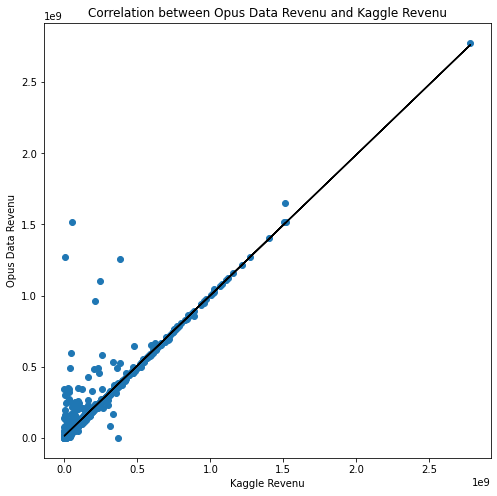

In [31]:
# Check for revenue
# eliminate 0 revenue rows
flitered_revenu_joined = joined[joined['revenue'] != 0]
# Draw a scatter plot
plt.figure(figsize=(8,8))
plt.scatter(flitered_revenu_joined.revenue, flitered_revenu_joined.opus_revenue)
plt.xlabel('Kaggle Revenu')
plt.ylabel('Opus Data Revenu')
plt.title('Correlation between Opus Data Revenu and Kaggle Revenu')
# Calculate correlation coefficient
corr = flitered_revenu_joined.revenue.corr(flitered_revenu_joined.opus_revenue)
print('The correlation coefficient: ' + str(corr))
# Calculate the slope and itercept of the line of best fit
slope, intercept = np.polyfit(flitered_revenu_joined.revenue, flitered_revenu_joined.opus_revenue, 1)
print('The slope of our line is: ' + str(slope) + '\n' + 'The intercept of our line is: ' + str(intercept))
# draw the line of best fit
plt.plot(flitered_revenu_joined.revenue, slope * flitered_revenu_joined.revenue + intercept, color = 'black')

There's a strong positive correlation of 0.94 between the two variables, the slope is 0.98 (almost one) and the intercept is 16 millions.

Even with an intercept of 16 millions, opus data is still valid for filling our missing values.

Check the correspondence between 'budget' and 'production_budget'.

The correlation coefficient: 0.9130612851565503
The slope of our line is: 0.9401265591154129
The intercept of our line is: 6169777.669863857


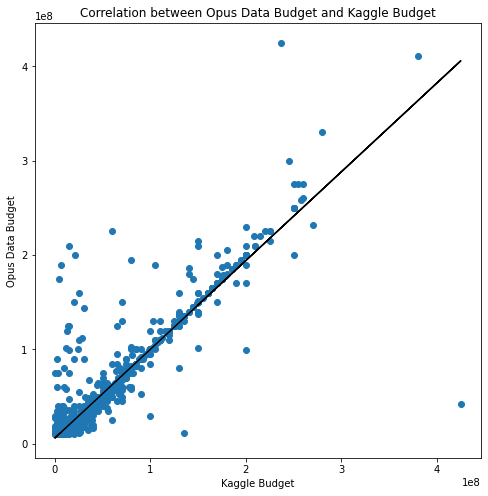

In [32]:
# Check budget
# Eliminate 0 budget rows
flitered_budget_joined = joined[joined['budget'] != 0]
# Draw the scatterplot
plt.figure(figsize=(8,8))
plt.scatter(flitered_budget_joined.budget, flitered_budget_joined.production_budget)
plt.xlabel('Kaggle Budget')
plt.ylabel('Opus Data Budget')
plt.title('Correlation between Opus Data Budget and Kaggle Budget')
# Calculate the correlation coefficient
corr = flitered_budget_joined.budget.corr(flitered_budget_joined.production_budget)
print('The correlation coefficient: ' + str(corr))
# Calculate the slope and itercept of the line of best fit
slope, intercept = np.polyfit(flitered_budget_joined.budget, flitered_budget_joined.production_budget, 1)
print('The slope of our line is: ' + str(slope) + '\n' + 'The intercept of our line is: ' + str(intercept))
# draw the line of best fit
plt.plot(flitered_budget_joined.budget, slope * flitered_budget_joined.budget + intercept, color = 'black')

There's a strong correlation of 0.91 between the two variables, the slope is 0.94 (almost one) and the intercept is 6 millions.

As for the revenue, the intercept is far from zero but the data is still valid to fill our missing values.

Note: Comparing our financial data with opus financial data gave us a bonus information.
    
In our dataset, we do not know what kind of budget or revenue the data represents but the similarity with opus financial data suggests that our budget is the production budget and that our revenue is the worldwide box office revenue of the movie. 


Check the number of missing values for both budget and revenue.

In [33]:
# Get the titles that miss budget and revenue
complete_values_df = joined[(joined['budget'] == 0 )| (joined['revenue'] == 0)]
complete_values_df.shape

(277, 35)

Fill the empty values.

In [34]:
for complete_movie_index, complete_movie_id in complete_values_df['id'].iteritems():
    # Get each movie as a pandas serie object
    missing_movie = df.query('id == {}'.format(complete_movie_id)).iloc[0]
    # Get the movie index in the original df
    missing_movie_index = missing_movie.name
    # Fill the missing budget value
    if missing_movie.budget == 0:
        df.at[missing_movie_index, 'budget'] = complete_values_df.at[complete_movie_index, 'production_budget']
    if missing_movie.revenue == 0:
        df.at[missing_movie_index, 'revenue'] = complete_values_df.at[complete_movie_index, 'opus_revenue']


In [35]:
# Check the number of zero budget values
df.query('budget == 0').shape

(5515, 21)

In [36]:
# Check the number of zero revenue values
df.query('revenue == 0').shape

(5799, 21)

We gained 181 rows for budget and 217 rows for revenue.

### Data Cleaning

#### Fill missing revenue, budget and runtime with the mean:

Get the mean of budget and revenue without the 0 values.

In [37]:
# Get the mean of budget without the 0 values
non_0_budget = df.query('budget != 0')
# Get the mean
non_0_budget_mean = non_0_budget.budget.mean()
non_0_budget_mean

31052133.823397495

The mean of budget without zero values is: 31052133.82

In [38]:
# Get the mean of revenue without the 0 values
non_0_revenue_mean = df.query('revenue != 0')['revenue'].mean()
non_0_revenue_mean

89622610.34162226

The mean of revenue without zero values is: 89622610.34

Create a function that replaces zero values with a specified value.

In [39]:
def replace_zeros(x, value):
    '''Return the provided value if x equals 0'''
    if x == 0:
        return value
    else:
        return x

Fill the 0 values in budget with the mean.

In [40]:
# Replace the zero values of budget with the mean
df.budget = df.budget.apply(replace_zeros, args = (non_0_budget_mean,))

Check that we don't have any 0 left value in budget.

In [41]:
# Check that we don't have any 0 value in budget
df[df['budget'] == 0].shape

(0, 21)

Fill the 0 values in revenue with the mean.

In [42]:
# Replace the zero values of revenue with the mean
df.revenue = df.revenue.apply(replace_zeros, args = (non_0_revenue_mean,))

Check that we don't have any 0 value left in revenue.

In [43]:
df[df['revenue'] == 0].shape

(0, 21)

Fill the 0 runtime values with the mean.

In [44]:
# Get the runtime mean without the zeros
non_0_runtime_mean = df.query('runtime != 0')['runtime'].mean()
# Replace the 0 values with the mean
df.runtime = df.runtime.apply(replace_zeros, args = (non_0_runtime_mean,))

Check that there are no zero values left in runtime.

In [45]:
df[df['runtime'] == 0].shape

(0, 21)

From an investor of perspective, it is better to express the gains from a movie in terms of return on investment (ROI).

Create the ‘roi’ column in our dataset. 

In [46]:
# Create roi column
df['roi'] = ((df.revenue - df.budget) * 100)/df.budget

#### Removing outliers:

As we saw earlier there are a lot of outliers in our numerical variables. We will use the IQR technique to exclude them from our data.

Data smaller than the first quartile minus 1.5 of the IQR or bigger than the third quartile plus 1.5 the IQR will be removed. 


Calculate the IQR.

In [47]:
# Get a list of the numerical variables of interest
cols = ['popularity', 'budget', 'revenue', 'runtime', 'vote_count', 'vote_average', 'roi']
# Calculate the first quartile
q1 = df[cols].quantile(0.25)
# Calculate the third quartile
q3 = df[cols].quantile(0.75)
# Calculate the IQR
iqr = q3 - q1

Create a mask to exclue outliers.

In [48]:
iqr_filter = ~((df[cols] < (q1 - 1.5 * iqr)) | (df[cols] > (q3 + 1.5 * iqr))).any(axis = 1)

Remove outliers.

In [49]:
df = df[iqr_filter]

#### Dealing with duplicated values:

Check the number of duplicated values.

In [50]:
#Check for duplicates
duplicated_mask = df.duplicated()
sum(duplicated_mask)

1

There's only one duplicate let's drop it.

In [51]:
df.drop_duplicates(inplace=True)

Check if there are duplicated titles in the dataset.

In [52]:
# Check duplicated titles
duplicated_titles_mask = df.duplicated(subset=['original_title'])
df[duplicated_titles_mask].sort_values('original_title')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,roi
5748,176068,tt2395385,0.336081,3.105213e+07,8.962261e+07,1,Rhys Wakefield|Logan Miller|Ashley Hinshaw|Nat...,NaN,Dennis Iliadis,Everyone wants one.,...,95.0,Thriller|Science Fiction,Process Productions,9/20/13,49,5.1,2013,0.000000e+00,0.000000,188.619812
7917,13189,tt0087056,0.542315,3.105213e+07,8.962261e+07,a christmas carol,George C. Scott|Roger Rees|David Warner|Susann...,NaN,Clive Donner,A new powerful presentation of the most loved ...,...,100.0,TV Movie|Fantasy|Drama|Comedy|Family,Entertainment Partners Ltd.,12/17/84,29,6.6,1984,0.000000e+00,0.000000,188.619812
10686,51992,tt0065398,0.080626,3.105213e+07,8.962261e+07,and soon the darkness,Pamela Franklin|Michele Dotrice|Sandor ElÃ¨s|J...,NaN,Robert Fuest,Remember the way Hitchcock kept you on the edg...,...,99.0,Mystery|Thriller,EMI Films Ltd.,9/10/70,10,7.5,1970,0.000000e+00,0.000000,188.619812
3908,86549,tt1753460,0.004748,3.105213e+07,8.962261e+07,august,Murray Bartlett|Daniel Dugan|Adrian Gonzalez,http://erapfilms.com/august/,Eldar Rapaport,NaN,...,100.0,Drama,NaN,6/9/11,12,6.4,2011,0.000000e+00,0.000000,188.619812
8825,14805,tt0211938,0.191104,3.500000e+07,8.962261e+07,bait,Jamie Foxx|David Morse|Robert Pastorelli|David...,NaN,Antoine Fuqua,Alvin Sanders is going to help the Feds catch ...,...,119.0,Action|Thriller|Crime,Castle Rock Entertainment|Warner Bros.,9/14/00,26,6.2,2000,4.432022e+07,0.000000,156.064601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7873,45964,tt0080130,0.125888,1.500000e+07,6.721544e+07,when a stranger calls,Carol Kane|Charles Durning|Colleen Dewhurst|To...,NaN,Fred Walton,...Fear is the Message!,...,97.0,Horror|Thriller,Columbia Pictures Corporation|Melvin Simon Pro...,10/26/79,16,6.0,1979,0.000000e+00,0.000000,348.102900
4124,39227,tt0324532,0.212966,3.105213e+07,8.962261e+07,when in rome,Mary-Kate Olsen|Ashley Olsen|Leslie Danon|Juli...,NaN,Steve Purcell,NaN,...,94.0,Action|Adventure|Comedy|Drama|Family,NaN,11/26/02,38,5.7,2002,0.000000e+00,0.000000,188.619812
8332,25095,tt0104181,0.269621,3.105213e+07,8.962261e+07,wuthering heights,Juliette Binoche|Ralph Fiennes|Jeremy Northam|...,NaN,Peter Kosminsky,A passion. An obsession. A love that destroyed...,...,105.0,Drama|Romance,Paramount Pictures,10/16/92,30,7.0,1992,0.000000e+00,0.000000,188.619812
3636,9364,tt1181614,0.414629,8.000000e+06,1.009150e+05,wuthering heights,Kaya Scodelario|James Northcote|Amy Wren|Nicho...,http://www.artificial-eye.com/film.php?cinema=...,Andrea Arnold,Love is a force of nature.,...,129.0,Drama|Romance,Ecosse Films|Film4 Productions,9/5/11,36,5.6,2011,7.755184e+06,97826.803468,-98.738563


There are indeed duplicate titles but the movies are different in all the other variables. Those duplicated movies seem to be remakes of previous movies of the same title. Since they are so different, they should be kept.

#### Remove the values that we couldn't fill with OMDb API:

Delete the rows with null genres that we couldn't fill with OMDb Api.

In [53]:
# Get the rows with missing values
missing_values_df = df[df.genres.isnull()]
# Get the indices of those rows
missing_values_index = missing_values_df.index
missing_values_index

Int64Index([1897, 2376, 3279, 4797], dtype='int64')

In [54]:
# Delete the indices from the dataframe
df.drop(labels=missing_values_index, inplace=True)

Check that there are no rows with null genre.

In [55]:
df[df.genres.isnull()].shape

(0, 22)

In [56]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'roi'],
      dtype='object')

#### Remove irrelevant columns for our analysis:

Delete the columns that we won't need for our analysis: 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj', 'revenue_adj' and 'cast', 'director'.

In [57]:
df.drop(columns=['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies',  'budget_adj', 'revenue_adj', 'cast', 'director'], inplace=True)

Check that the columns are deleted.

In [58]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'roi'],
      dtype='object')

#### Turn release_date column into a date object:

First, we create a column 'full_release_date' with the year written with its century. We don't want to have the year 2066 in our column.

In [59]:
df['full_release_date'] = df[['release_date', 'release_year']].apply(lambda x : '{}{}'.format(x[0][:x[0].rfind('/') + 1], x[1]), axis = 1)

Convert 'full_release_date' column to a datetime object.

In [60]:
df.full_release_date = pd.to_datetime(df.full_release_date, format = '%m/%d/%Y')

<a id='eda'></a>
## Exploratory Data Analysis

### Metrics:

Our two principal metrics are revenue and ROI.

In order to consider popularity and vote average as valid metrics, they need to correlate with our financial metrics. 

###### What's the distribution of revenue ?

To express the revenue in millions, we need to define a function that will convert our values to the desired format.

In [61]:
def to_millions(x, pos):
    return '$%1.1fM' % (x*1e-6)

Import FuncFornatter, a python object that we will use to format our values.

In [62]:
# Import the necessary class for formatting 
from matplotlib.ticker import FuncFormatter

Plot the distribution of revenue.

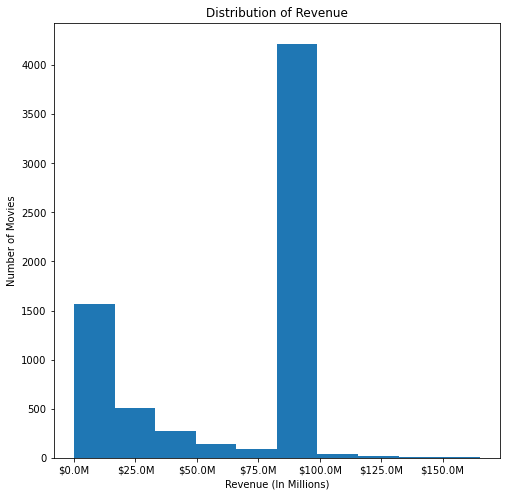

In [63]:
# Set figure size
plt.figure(figsize=(8,8))
plt.hist(df.revenue)
plt.xlabel('Revenue (In Millions)')
# Convert our values to the desired format
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_millions))
plt.ylabel('Number of Movies')
plt.title('Distribution of Revenue');

Get a summary of our variable.

In [64]:
df.revenue.describe()

count    6.856000e+03
mean     6.290604e+07
std      3.721335e+07
min      2.000000e+00
25%      2.012558e+07
50%      8.962261e+07
75%      8.962261e+07
max      1.651842e+08
Name: revenue, dtype: float64

There are two peaks in our data, one between 0 and 25 million dollars and a second one between 75 and 100 million dollars.

The median revenue for a movie is 90 million dollars.

###### What's the distribution of return on investment (ROI) ?

In order to format 'roi' values as percentages, we need to import PercentFormatter.

In [65]:
from matplotlib.ticker import PercentFormatter

Plot the distribution of ‘roi’. The columns that contain losses are red and the columns that contain only gains are blue.

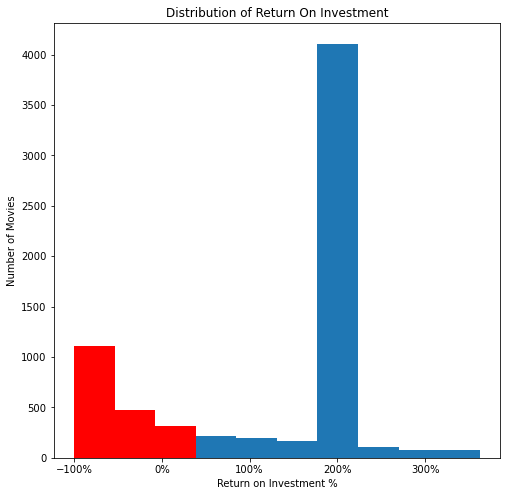

In [66]:
# Set figure size
plt.figure(figsize=(8,8))
# Get the bin lower edges (bins) and the columns of the histogram (patches)
_, bins, patches = plt.hist(df.roi)
# Color the column with red if it contains losses
for bi, patch in zip(bins, patches):
    if bi < 0:
        patch.set_facecolor('red')
# Format the X axis as a percentage
plt.gca().xaxis.set_major_formatter(PercentFormatter())
plt.xlabel('Return on Investment %')
plt.ylabel('Number of Movies')
plt.title('Distribution of Return On Investment');

In [67]:
df.roi.describe()

count    6856.000000
mean      118.093671
std       114.798415
min       -99.999990
25%        11.105414
50%       188.619812
75%       188.619812
max       362.120956
Name: roi, dtype: float64

There are two peaks in our distribution: a peak for losses between -100% and 0% and a second peak in the gains centered around 200%.

The median ROI is 189%. 

The first quartile's boundaries are -100% and 11%, this means that 1 in 4 movie in our dataset makes losses or a very small gain.

###### What's the relationship between popularity and revenue ?

To answer this question and many others in this report, we will need to create each time a scatter plot, a line of best fit and calculate the correlation coefficient. 

Let's create a function to automate this task and also print the coefficient of determination, the slope and the intercept of the line of best fit.

In [68]:
def describe_relationship(x ,y, xlabel, ylabel, title, size =(8,8), colors = None, color_map = None):
    # Draw the scatterplot
    _, ax = plt.subplots(figsize=size)
    # c and cmap will the used later to draw negative points in red
    # when we will draw the relationships with ROI
    ax.scatter(x, y, c=colors, cmap = color_map)
    # Get the line of best fit arguments
    slope, intercept = np.polyfit(x, y, 1)
    # Draw the line of best fit
    ax.plot(x, slope * x + intercept, color = 'black')
    # Set the title, xlabel and ylabel
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    # Calculate the correlation coefficient
    r = x.corr(y)
    # Calculate the coefficient of determination
    rsquared = np.square(r)
    # Print our values
    print('The coefficient of correlation is: ' + str(r))
    print('The coefficient of determination is: ' + str(rsquared))
    print('The slope of the line of best fit is: ' + str(slope))
    print('The intercept of the line of best fit is: ' + str(intercept))
    # Return the axes object for more customization
    return ax

Plot a scatterplot of popularity VS revenue.

The coefficient of correlation is: -0.24226277739465396
The coefficient of determination is: 0.05869125331097166
The slope of the line of best fit is: -33848423.822065406
The intercept of the line of best fit is: 75621855.48195295


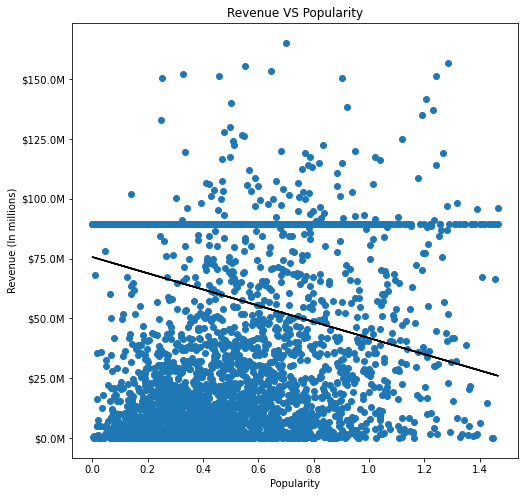

In [69]:
# Draw the scatterplot and the line of best fit
ax = describe_relationship(df.popularity, df.revenue, 'Popularity', 'Revenue (In millions)', 'Revenue VS Popularity')
# Format the revenue to millions
ax.yaxis.set_major_formatter(FuncFormatter(to_millions))

The correlation coefficient is: -0.24.

There is a poor negative linear relationship between the revenue and the popularity of a movie. 

6% of the variation in revenue is explained by the popularity. 

###### What's the relationship between popularity and ROI ?

The coefficient of correlation is: -0.20036395004790128
The coefficient of determination is: 0.040145712478797876
The slope of the line of best fit is: -86.35917442183153
The intercept of the line of best fit is: 150.53617587667014


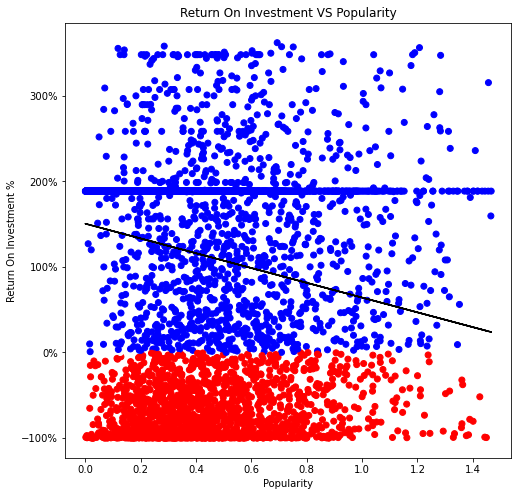

In [70]:
ax = describe_relationship(df.popularity, df.roi, 'Popularity', 'Return On Investment %', 'Return On Investment VS Popularity',
                          # Draw the losses in red and the gains in blue
                          colors = np.sign(df.roi), 
                          color_map='bwr_r')
# Format ROI as a percentage
ax.yaxis.set_major_formatter(PercentFormatter())

The correlation coefficient is: -0.20.

There is a poor negative linear relationship between the ROI and the popularity of a movie. 

4% of the variation in ROI is explained by the popularity. 

###### What's the relationship between vote average and revenue ?

The coefficient of correlation is: -0.055278885641509026
The coefficient of determination is: 0.0030557551977670326
The slope of the line of best fit is: -2453222.2651609485
The intercept of the line of best fit is: 77379725.66260254


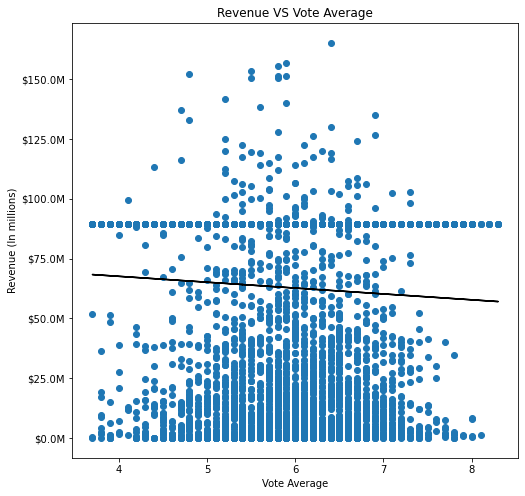

In [71]:
# Draw the scatterplot and the line of best fit
ax = describe_relationship(df.vote_average, df.revenue, 'Vote Average', 'Revenue (In millions)', 'Revenue VS Vote Average')
# Format the revenue to millions
ax.yaxis.set_major_formatter(FuncFormatter(to_millions))

With a correlation coefficient of -0.05, it seems that there is no linear relationship between vote average and revenue. However, if we look closely at the scatter plot, it looks like the points are drawing a bell shape.

###### What's the relationship between ROI and vote average ?

The coefficient of correlation is: -0.03170746233444505
The coefficient of determination is: 0.0010053631676902514
The slope of the line of best fit is: -4.340864622848765
The intercept of the line of best fit is: 143.70420278054075


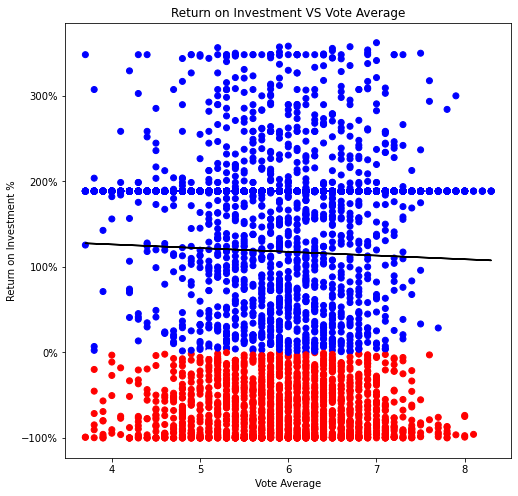

In [72]:
# Draw the scatterplot and the line of best fit
ax = describe_relationship(df.vote_average, df.roi, 'Vote Average', 'Return on Investment %', 'Return on Investment VS Vote Average',
                          colors = np.sign(df.roi),
                          color_map='bwr_r')
# Format the roi to millions
ax.yaxis.set_major_formatter(PercentFormatter())

ROI seems to follow the same trend of revenue with vote average. 

### Factors:

###### What’s the distribution of budget ?

Text(0.5, 1.0, 'Distribution of Budget')

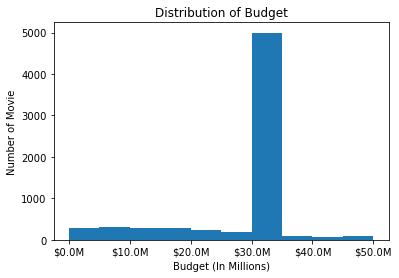

In [73]:
plt.hist(df.budget)
# Format budget to millions
plt.gca().xaxis.set_major_formatter(to_millions)
plt.xlabel('Budget (In Millions)')
plt.ylabel('Number of Movie')
plt.title('Distribution of Budget')

In [74]:
df.budget.describe()

count    6.856000e+03
mean     2.776674e+07
std      8.691219e+06
min      6.000000e+00
25%      3.105213e+07
50%      3.105213e+07
75%      3.105213e+07
max      5.000000e+07
Name: budget, dtype: float64

It seems that most of the values are located between 30 and 40 million. The median budget for a movie is 31 million. 

###### What’s the relationship between budget and revenue ?

The coefficient of correlation is: 0.5491607321642442
The coefficient of determination is: 0.30157750975116876
The slope of the line of best fit is: 2.3513515156931986
The intercept of the line of best fit is: -2383330.365651193


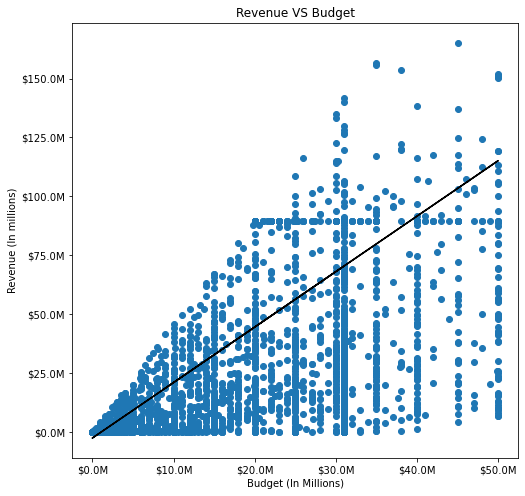

In [75]:
ax = describe_relationship(df.budget, df.revenue, 'Budget (In Millions)', 'Revenue (In millions)', 'Revenue VS Budget')
# format budget and revenue to millions
ax.xaxis.set_major_formatter(to_millions)
ax.yaxis.set_major_formatter(to_millions)

The correlation coefficient is: 0.55.

There is a moderate positive linear relationship between the budget and the revenue of a movie. 

30% of the variation in the revenue can be explained by the budget. 

###### What’s the relationship between budget and ROI ?

The coefficient of correlation is: 0.23542007150685992
The coefficient of determination is: 0.05542261006829504
The slope of the line of best fit is: 3.109558340955015e-06
The intercept of the line of best fit is: 31.75137268597811


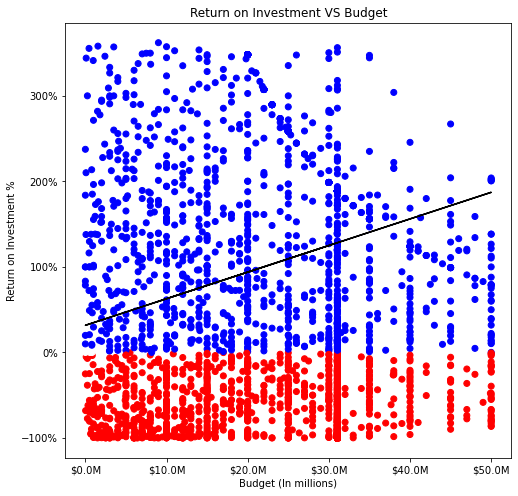

In [76]:
ax = describe_relationship(df.budget, df.roi, 'Budget (In millions)', 'Return on Investment %', 'Return on Investment VS Budget',
                          colors = np.sign(df.roi),
                          color_map='bwr_r')
# Format ROI as a percentage
ax.yaxis.set_major_formatter(PercentFormatter())
# Format budget in millions
ax.xaxis.set_major_formatter(to_millions)

The correlation coefficient is: 0.24 .

There is a poor positive linear relationship between the budget and the ROI of a movie. 

6% of the variation in the ROI can be explained by the budget. 

###### What’s the average budget for each genre ?

Make genres lowercase.

In [77]:
df.genres = df.genres.str.lower()

First we need to know the available genres in our dataset.

In [78]:
# Create a list that will contain all the genres of each movie in the dataframe.
genres_list = []
for genres in df.genres:
    # Split the genres string of each movie into a list
    # Remove white spaces from the list of genres before appending it
    # Append the list of genres of the current movie to the list of all the previous movies
    genres_list = genres_list + [s.strip() for s in genres.split('|')]
# Delete duplicate elements
unique_genres = list(set(genres_list))
# Print the genres
unique_genres

['crime',
 'thriller',
 'science fiction',
 'action',
 'animation',
 'tv movie',
 'documentary',
 'family',
 'drama',
 'history',
 'comedy',
 'fantasy',
 'war',
 'romance',
 'mystery',
 'biography',
 'adventure',
 'music',
 'horror',
 'foreign',
 'western']

Because each movie has many genres, we can’t directly use the groupby function of the dataframe. Instead, we need to create a custom function that will group by each genre at a time. 

In [79]:
def groupby_genres(df, x, genre):
    # Get the element at the x position
    # Search for the provided genre in the current element
    if df.at[x, 'genres'].find(genre) != -1:
        # If the genre is found, return it.
        return genre
    else:
        # If it's not found, return 'Not genre'
        # Note that what we will return in this case is not very important
        # because we will group by the values where the provided genre was found
        return 'Not ' + genre

Group by each genre at a time.

In [80]:
mean_budgets = []
# Iterate through the unique genres
for genre in unique_genres:
    # For each genre calculate the mean budget
    mean = df.groupby(lambda x : groupby_genres(df, x, genre), axis = 0).mean().loc[genre]['budget']
    mean_budgets.append(mean)

Plot the average budget for a movie containing a specific genre.

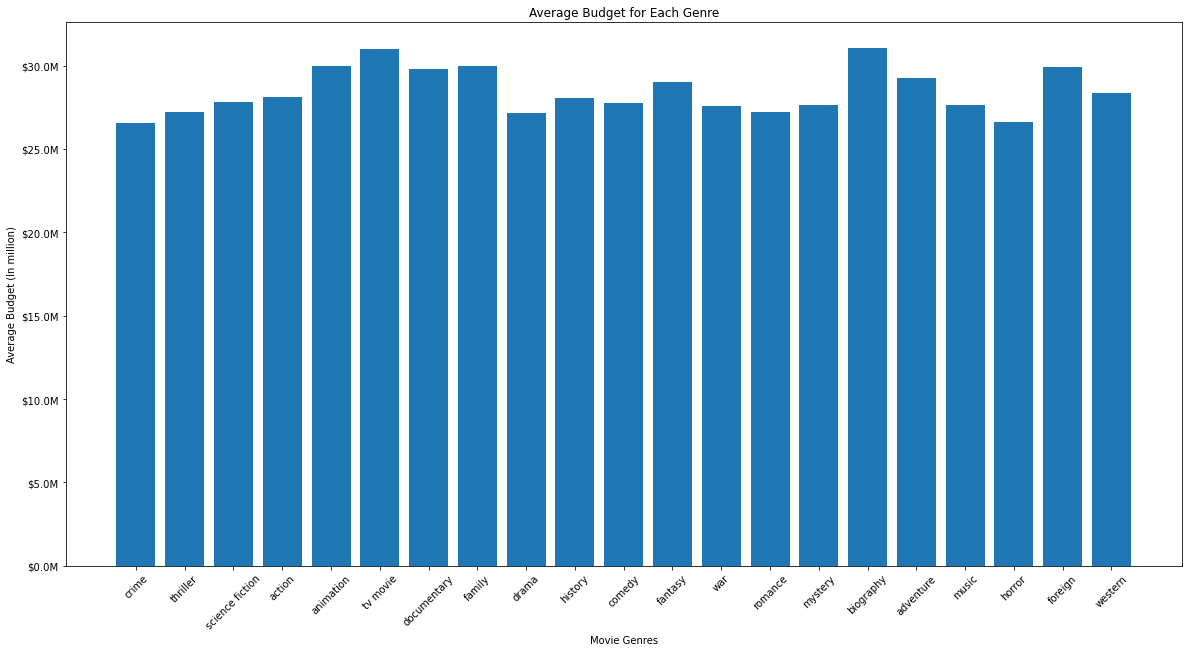

In [91]:
# Plot the average budget for a movie containing one specific genre
plt.figure(figsize=(20, 10))
plt.bar(range(len(mean_budgets)), mean_budgets)
plt.xticks(range(len(unique_genres)), unique_genres, rotation = 45);
plt.xlabel('Movie Genres')
plt.ylabel('Average Budget (In million)')
plt.gca().yaxis.set_major_formatter(to_millions)
plt.title('Average Budget for Each Genre');

Print the average budgets for each genre and the genre with the maximum and the minimum budget.

In [82]:
min_mean = min(mean_budgets)
min_genre = ''
max_mean = max(mean_budgets)
max_genre = ''
for genre, mean in zip(unique_genres, mean_budgets):
    if mean == min_mean:
        min_genre = genre
    if mean == max_mean:
        max_genre = genre
    print('The mean budget for: ' + genre + ' is: ' + str(mean))
    
print('----------------------------------------------------------\n')
print('The genre with the minimum average budget is: ' + min_genre + ' with a budget of: ' + str(min_mean))
print('The genre with the maximum average budget is: ' + max_genre + ' with a budget of: ' + str(max_mean))

The mean budget for: crime is: 26537328.327247817
The mean budget for: thriller is: 27238545.345810123
The mean budget for: science fiction is: 27797124.27161917
The mean budget for: action is: 28134922.774064984
The mean budget for: animation is: 29993878.402981244
The mean budget for: tv movie is: 31007632.83940197
The mean budget for: documentary is: 29782921.779747337
The mean budget for: family is: 29978477.60227444
The mean budget for: drama is: 27176693.85746123
The mean budget for: history is: 28082007.598065816
The mean budget for: comedy is: 27732199.23269273
The mean budget for: fantasy is: 29040670.76331076
The mean budget for: war is: 27607218.42428121
The mean budget for: romance is: 27230217.202029508
The mean budget for: mystery is: 27655499.47386762
The mean budget for: biography is: 31052133.823397495
The mean budget for: adventure is: 29263312.930843692
The mean budget for: music is: 27650020.49415617
The mean budget for: horror is: 26645531.696739875
The mean budget

The average budget for the genres varies between 26 million and 31 million not far from the median budget. 

###### What’s the average ROI for each genre ?

Calculate the mean ROI for each genre.

In [83]:
# A list of the mean roi
mean_roi = []
#Iterate through the genres
for genre in unique_genres:
    roi = df.groupby(lambda x : groupby_genres(df, x, genre), axis = 0).mean().loc[genre]['roi']
    mean_roi.append(roi)

Plot the average ROI for each genre.

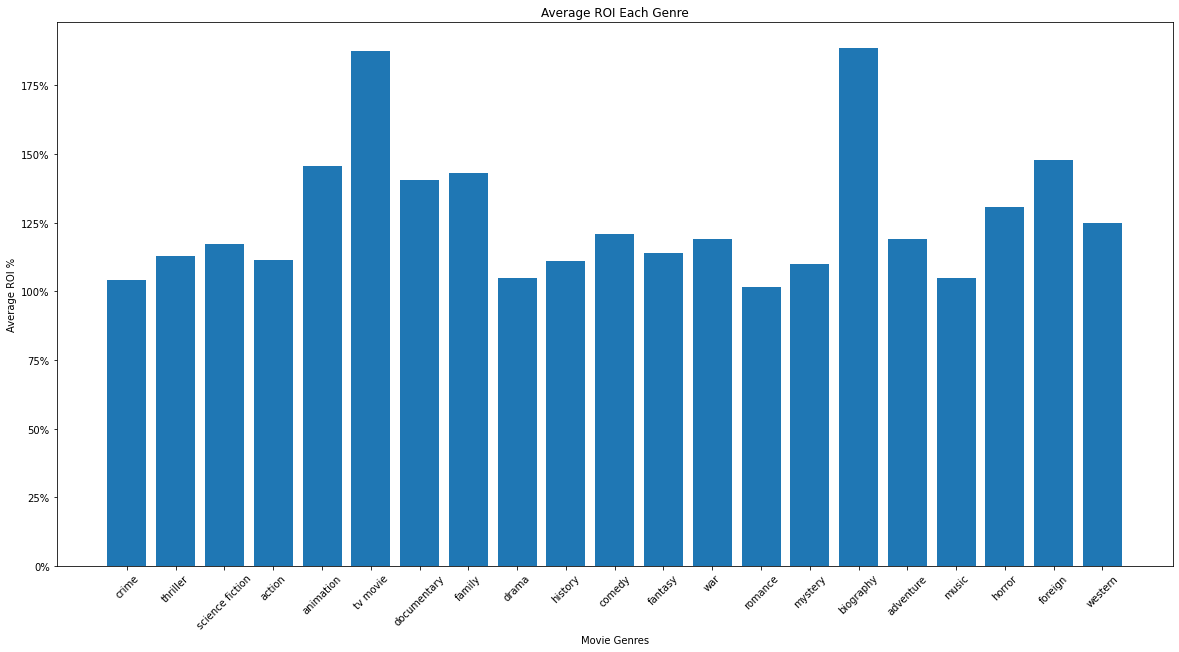

In [92]:
# Plot the roi for each genre
plt.figure(figsize=(20, 10))
plt.bar(range(len(mean_roi)), mean_roi)
plt.xticks(range(len(unique_genres)), unique_genres, rotation = 45);
plt.xlabel('Movie Genres')
plt.ylabel('Average ROI %')
plt.title('Average ROI Each Genre')
plt.gca().yaxis.set_major_formatter(PercentFormatter())

Print the average ROI for each genre and the genre with the maximum and the minimum ROI.

In [85]:
min_roi = min(mean_roi)
min_genre = ''
max_roi = max(mean_roi)
max_genre = ''
for genre, roi in zip(unique_genres, mean_roi):
    if roi == min_roi:
        min_genre = genre
    if roi == max_roi:
        max_genre = genre
    print('The mean ROI for: ' + genre + ' is: ' + str(roi))
    
print('----------------------------------------------------------\n')
print('The genre with the minimum average ROI is: ' + min_genre + ' with an average ROI of: ' + str(min_roi))
print('The genre with the maximum average ROI is: ' + max_genre + ' with an average ROI of: ' + str(max_roi))

The mean ROI for: crime is: 104.06709516378343
The mean ROI for: thriller is: 112.91518660038966
The mean ROI for: science fiction is: 117.3883778516906
The mean ROI for: action is: 111.40779270505953
The mean ROI for: animation is: 145.74143700105247
The mean ROI for: tv movie is: 187.64838501578825
The mean ROI for: documentary is: 140.48809561168773
The mean ROI for: family is: 143.0028973307274
The mean ROI for: drama is: 104.9012732105959
The mean ROI for: history is: 110.99993089062204
The mean ROI for: comedy is: 121.00614084500805
The mean ROI for: fantasy is: 114.11984198936224
The mean ROI for: war is: 118.96530713859842
The mean ROI for: romance is: 101.4106048777345
The mean ROI for: mystery is: 109.86624153871865
The mean ROI for: biography is: 188.61981225294235
The mean ROI for: adventure is: 118.90796021329585
The mean ROI for: music is: 104.77019470525131
The mean ROI for: horror is: 130.59690950222193
The mean ROI for: foreign is: 147.7082204251135
The mean ROI for: w

The average ROI for the genres varies between 101% and 189%.

###### What's the average revenue for each genre ?

Calculate the average revenue for each genre.

In [87]:
# A list of the mean popularity
mean_revenue = []
#Iterate through the genres
for genre in unique_genres:
    revenue = df.groupby(lambda x : groupby_genres(df, x, genre), axis = 0).mean().loc[genre]['revenue']
    mean_revenue.append(revenue)

Plot the average revenue for each genre.

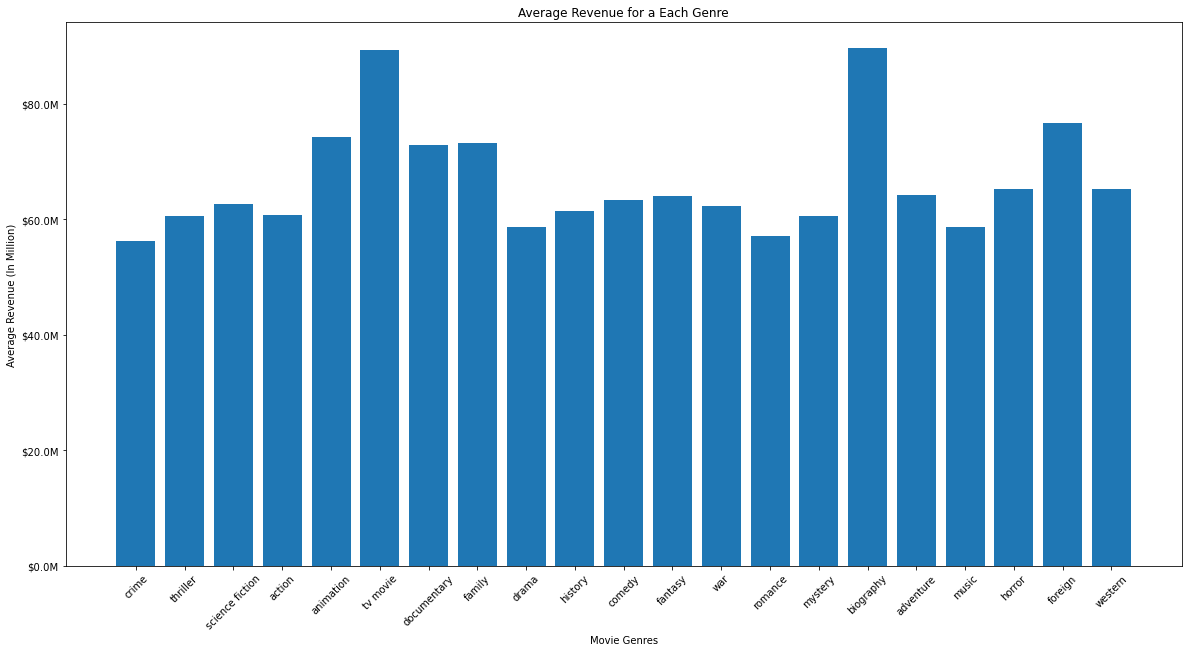

In [95]:
# Plot the mean popularity for each genre
plt.figure(figsize=(20, 10))
plt.bar(range(len(mean_revenue)), mean_revenue)
plt.xticks(range(len(unique_genres)), unique_genres, rotation = 45);
plt.xlabel('Movie Genres')
plt.ylabel('Average Revenue (In Million)')
plt.gca().yaxis.set_major_formatter(to_millions)
plt.title('Average Revenue for a Each Genre');

Print the average revenue for each genre and the genre with the maximum and the minimum revenue.

In [98]:
min_revenue = min(mean_revenue)
min_genre = ''
max_revenue = max(mean_revenue)
max_genre = ''
for genre, revenue in zip(unique_genres, mean_revenue):
    if revenue == min_revenue:
        min_genre = genre
    if revenue == max_revenue:
        max_genre = genre
    print('The mean revenue for: ' + genre + ' is: ' + str(revenue))
    
print('----------------------------------------------------------\n')
print('The genre with the minimum average revenue is: ' + min_genre + ' with an average revenue of: ' + str(min_revenue))
print('The genre with the maximum average revenue is: ' + max_genre + ' with an average revenue of: ' + str(max_revenue))

The mean revenue for: crime is: 56255879.60328162
The mean revenue for: thriller is: 60536010.83053432
The mean revenue for: science fiction is: 62617883.1875014
The mean revenue for: action is: 60675278.76271758
The mean revenue for: animation is: 74241085.93898831
The mean revenue for: tv movie is: 89251314.87587485
The mean revenue for: documentary is: 72825735.54881932
The mean revenue for: family is: 73239474.39403915
The mean revenue for: drama is: 58566961.709538974
The mean revenue for: history is: 61506167.43330642
The mean revenue for: comedy is: 63350447.08677373
The mean revenue for: fantasy is: 63942138.7233104
The mean revenue for: war is: 62211543.20044831
The mean revenue for: romance is: 57125500.62661269
The mean revenue for: mystery is: 60578090.92918175
The mean revenue for: biography is: 89622610.34162226
The mean revenue for: adventure is: 64217845.76672382
The mean revenue for: music is: 58658976.04978679
The mean revenue for: horror is: 65187048.31330853
The mea

The average revenue for each genre varies between 56 million and 89 million.

###### What's the average revenue for each month of the year ?

Create a month column in our dataframe.

In [110]:
df['month'] = df.full_release_date.dt.strftime('%m')

Calculate the average revenue for each month of the year. 

In [112]:
month_average_revenue = df.groupby('month').mean()['revenue']

Plot the average revenue for each month of the year.

Text(0.5, 1.0, 'Average Revenue for Each Month of the Year')

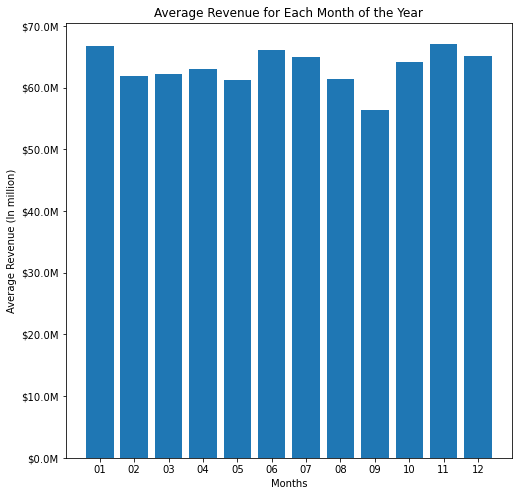

In [151]:
plt.figure(figsize=(8,8))
plt.bar(range(len(month_average_revenue)), month_average_revenue)
plt.xticks(range(len(month_average_revenue)), month_average_revenue.index)
plt.gca().yaxis.set_major_formatter(to_millions)
plt.xlabel('Months')
plt.ylabel('Average Revenue (In million)')
plt.title('Average Revenue for Each Month of the Year')

Print the average revenue for each month.

In [152]:
month_average_revenue

month
01    6.670243e+07
02    6.185183e+07
03    6.210713e+07
04    6.300329e+07
05    6.122776e+07
06    6.612675e+07
07    6.493516e+07
08    6.132264e+07
09    5.628741e+07
10    6.410904e+07
11    6.710890e+07
12    6.504855e+07
Name: revenue, dtype: float64

Print the month with the minimum average revenue.

In [154]:
month_average_revenue[month_average_revenue == min(month_average_revenue)]

month
09    5.628741e+07
Name: revenue, dtype: float64

Print the month with the maximum average revenue.

In [155]:
month_average_revenue[month_average_revenue == max(month_average_revenue)]

month
11    6.710890e+07
Name: revenue, dtype: float64

The average revenue for each month varies between 56 million and 67 million. 

###### What's the average ROI for each month of the year ?

Calculate the ROI for each month.

In [160]:
month_average_roi = df.groupby('month').mean()['roi']

month
01    127.138416
02    110.529130
03    115.365758
04    119.870166
05    115.210497
06    125.369761
07    127.351862
08    114.700486
09     98.411301
10    120.933837
11    128.440423
12    128.514041
Name: roi, dtype: float64

Plot the average ROI for each month of the year.

Text(0.5, 1.0, 'Average ROI for Each Month of the Year')

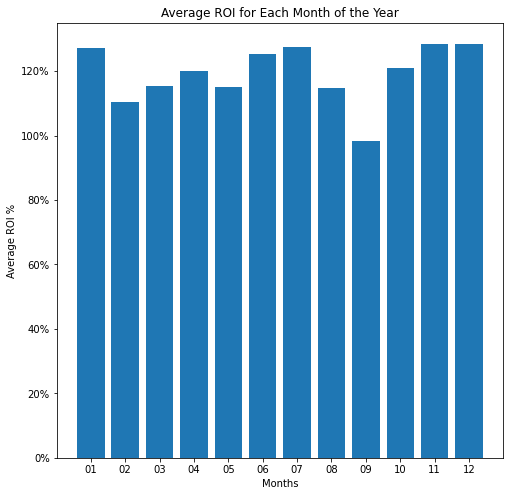

In [162]:
plt.figure(figsize=(8,8))
plt.bar(range(len(month_average_roi)), month_average_roi)
plt.xticks(range(len(month_average_roi)), month_average_roi.index)
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.xlabel('Months')
plt.ylabel('Average ROI %')
plt.title('Average ROI for Each Month of the Year')

Print the average ROI for each month.

In [163]:
month_average_roi

month
01    127.138416
02    110.529130
03    115.365758
04    119.870166
05    115.210497
06    125.369761
07    127.351862
08    114.700486
09     98.411301
10    120.933837
11    128.440423
12    128.514041
Name: roi, dtype: float64

Print the month with the minimum ROI.

In [166]:
month_average_roi[month_average_roi == min(month_average_roi)]

month
09    98.411301
Name: roi, dtype: float64

Print the month with the maximum ROI.

In [167]:
month_average_roi[month_average_roi == max(month_average_roi)]

month
12    128.514041
Name: roi, dtype: float64

The average ROI for each month of the year varies between 98% and  129%.

<a id='conclusions'></a>
## Conclusions

* With a median revenue of 90 million dollars and a median ROI of 189%, a movie can be a good investment. However, it can also be a risky one since 1 in 4 movie makes losses. The losses can be big because the median budget for a movie is 31 million dollars.

* Popularity on TMDb doesn’t appear to be a good metric because the correlation with ROI and revenue is poor. Also, the negative nature of the relationship is counter-intuitive. This result can be explained by the fact that our budget variable may only represent the cost of production without taking into account marketing costs.

* The relationship between vote average and both ROI and revenue doesn’t seem to be linear.  It will require further investigations to understand if we can use it as a metric. 

* The moderate positive correlation between budget and revenue (explains 30% of the variance) suggests that big budget movies tend to make more revenue.

* The positive correlation between budget and ROI is very weak (explains barely 6% of the variance). This suggests that even if a movie makes more revenue, it may not be a financial success. It can even make huge losses.

* The budget for each genre does not vary a lot. This can mean that movies are likely to cost approximately the same to produce. 

* There seems to be some variation in the movie’s ROI according to its genre. Some genres (biography and tv movie) are more cost-effective than others (romance and drama). The average revenue for each genre seems to follow the same trend.

* It appears that the revenue of a movie is affected by the month of its release. Movies make more revenue when they are released in certain months (December) and they make less in others (September). The average ROI for each month seems to follow the same trend. 
